In [13]:
import csv
def load_csv(filename):
    with open(filename,"r") as csvfile: 
        lines = csv.reader(csvfile)
    return lines
    
a=load_csv("/home/shashanksoni092/DataScienceWorkspace/DataScienceProjectsPdf/LogisticRegression/claimants.csv")


AttributeError: '_csv.reader' object has no attribute 'dim'

In [27]:
def diference_quotient(f,h,x=1):
    return (f(x+h)-f(x))/h

#diference_quotient(x**2,0,x=1)

NameError: name 'x' is not defined

In [32]:

from __future__ import division
from collections import Counter
from linear_algebra import distance, vector_subtract, scalar_multiply
import math, random

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def plot_estimated_derivative():

    def square(x):
        return x * x

    def derivative(x):
        return 2 * x

    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    x = range(-10,10)
    plt.plot(x, map(derivative, x), 'rx')           # red  x
    plt.plot(x, map(derivative_estimate, x), 'b+')  # blue +
    plt.show()                                      # purple *, hopefully

def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
         
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)] 

def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v): 
    return [2 * v_i for v_i in v]

def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')         # this means "infinity" in Python
    return safe_f


#
# 
# minimize / maximize batch
#
#

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0                           # set theta to initial value
    target_fn = safe(target_fn)               # safe version of target_fn
    value = target_fn(theta)                  # value we're minimizing
    
    while True:
        gradient = gradient_fn(theta)  
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
                   
        # choose the one that minimizes the error function        
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)
    
def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0, 
                          tolerance)

#
# minimize / maximize stochastic
#

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = zip(x, y)
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points        
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

if __name__ == "__main__":

    print("using the gradient")

    v = [random.randint(-10,10) for i in range(3)]

    tolerance = 0.0000001

    while True:
        #print v, sum_of_squares(v)
        gradient = sum_of_squares_gradient(v)   # compute the gradient at v
        next_v = step(v, gradient, -0.01)       # take a negative gradient step
        if distance(next_v, v) < tolerance:     # stop if we're converging
            break
        v = next_v                              # continue if we're not

    print("minimum v", v)
    print("minimum value", sum_of_squares(v))
    print()


    print("using minimize_batch")

    v = [random.randint(-10,10) for i in range(3)]

    v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)

    print("minimum v", v)
print("minimum value", sum_of_squares(v))

ModuleNotFoundError: No module named 'linear_algebra'

In [35]:
import random
v = [random.randint(-10,10) for i in range(3)]
v

[-3, -10, -6]

In [39]:
vs=[-3,-10,-6]
grads=[-6,-20,-12]

next_vs=[vs_i+(-0.01)*grads_i for vs_i,grads_i in zip(vs,grads)]
next_vs

[-2.94, -9.8, -5.88]

In [40]:
print("using minimize_batch")
v = [random.randint(-10,10) for i in range(3)]
v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)

IndentationError: unexpected indent (<ipython-input-40-63df20399801>, line 3)

In [41]:
def sum_of_squares_gradient(v): 
    return [2 * v_i for v_i in v]

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

In [52]:
import numpy as np
X = 2 * np.random.rand(100,1)
print(X)
y = 4 +3 * X+np.random.randn(100,1)
print()
print(y)

z=np.random.randn(100,1)
#help(np.random.randn)
print()
print(z)

[[1.76204627]
 [1.64498929]
 [1.64112942]
 [1.6270919 ]
 [0.63057522]
 [0.0876005 ]
 [1.23694068]
 [1.00144871]
 [0.53783123]
 [1.24826301]
 [1.26422348]
 [0.55192448]
 [1.85096655]
 [0.02881855]
 [1.66809614]
 [1.14414523]
 [1.69243012]
 [1.4179879 ]
 [1.04514301]
 [0.93582881]
 [0.34247696]
 [1.52733168]
 [1.68894358]
 [1.60277691]
 [0.0480982 ]
 [1.1525834 ]
 [0.56997021]
 [0.81904774]
 [0.44885266]
 [0.62826158]
 [0.57480312]
 [1.22137433]
 [1.5148552 ]
 [0.07630302]
 [0.03065079]
 [0.14164451]
 [1.24051587]
 [1.39479433]
 [0.93050551]
 [1.33404532]
 [1.70652133]
 [1.73159601]
 [1.90078454]
 [0.77203758]
 [0.16723466]
 [0.72807234]
 [0.34097752]
 [1.01623916]
 [0.44284664]
 [0.28641743]
 [0.98489404]
 [1.02633063]
 [0.51515824]
 [0.65352938]
 [1.92393429]
 [0.51505776]
 [0.39956115]
 [0.17481616]
 [0.80885612]
 [1.39585202]
 [1.00642749]
 [0.40033346]
 [1.79934511]
 [0.37861103]
 [0.87325658]
 [1.99154696]
 [1.69699369]
 [1.75207076]
 [1.78434289]
 [1.57422116]
 [1.09178617]
 [1.84

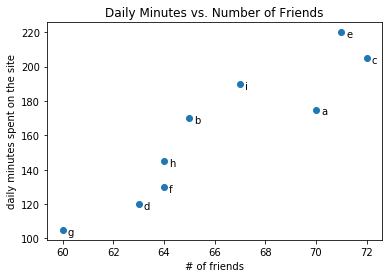

In [56]:
import matplotlib.pyplot as plt
def make_chart_scatter_plot(plt):

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
    
    plt.scatter(friends, minutes)
    
    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
plt.show()

make_chart_scatter_plot(plt)

In [77]:

X_b = np.c_[np.ones((100,1)),X,np.ones((100,1))]
print(X_b)
help(np.c_)

[[1.         1.76204627 1.        ]
 [1.         1.64498929 1.        ]
 [1.         1.64112942 1.        ]
 [1.         1.6270919  1.        ]
 [1.         0.63057522 1.        ]
 [1.         0.0876005  1.        ]
 [1.         1.23694068 1.        ]
 [1.         1.00144871 1.        ]
 [1.         0.53783123 1.        ]
 [1.         1.24826301 1.        ]
 [1.         1.26422348 1.        ]
 [1.         0.55192448 1.        ]
 [1.         1.85096655 1.        ]
 [1.         0.02881855 1.        ]
 [1.         1.66809614 1.        ]
 [1.         1.14414523 1.        ]
 [1.         1.69243012 1.        ]
 [1.         1.4179879  1.        ]
 [1.         1.04514301 1.        ]
 [1.         0.93582881 1.        ]
 [1.         0.34247696 1.        ]
 [1.         1.52733168 1.        ]
 [1.         1.68894358 1.        ]
 [1.         1.60277691 1.        ]
 [1.         0.0480982  1.        ]
 [1.         1.1525834  1.        ]
 [1.         0.56997021 1.        ]
 [1.         0.81904774 1.  

In [64]:
a=np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [71]:
np.ones((100,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [78]:
def reverse(string):
  if len(string) == 0:
    return ''
  else:
    return string[-1] + reverse(string[:-1])

In [79]:
reverse("abcd")

'dcba'

In [81]:
reverse("1234")

'4321'

In [82]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
       Performs gradient descent to learn theta
    """
    m = y.size  # number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
    return theta

In [92]:
import numpy as np
X=np.random.rand(100,1)*3
X=np.c_[np.ones((100,1)),X]
y=4+np.random.rand(100,1)*3
theta=[0.2,0.3]
thetas=gradientDescent(X,y,theta,0.01,1000)
print(X.shape,y.shape)

ValueError: operands could not be broadcast together with shapes (2,) (2,100) 